<a href="https://colab.research.google.com/github/bkcrcb/codsoft/blob/main/task3/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Codsoft/titanic/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

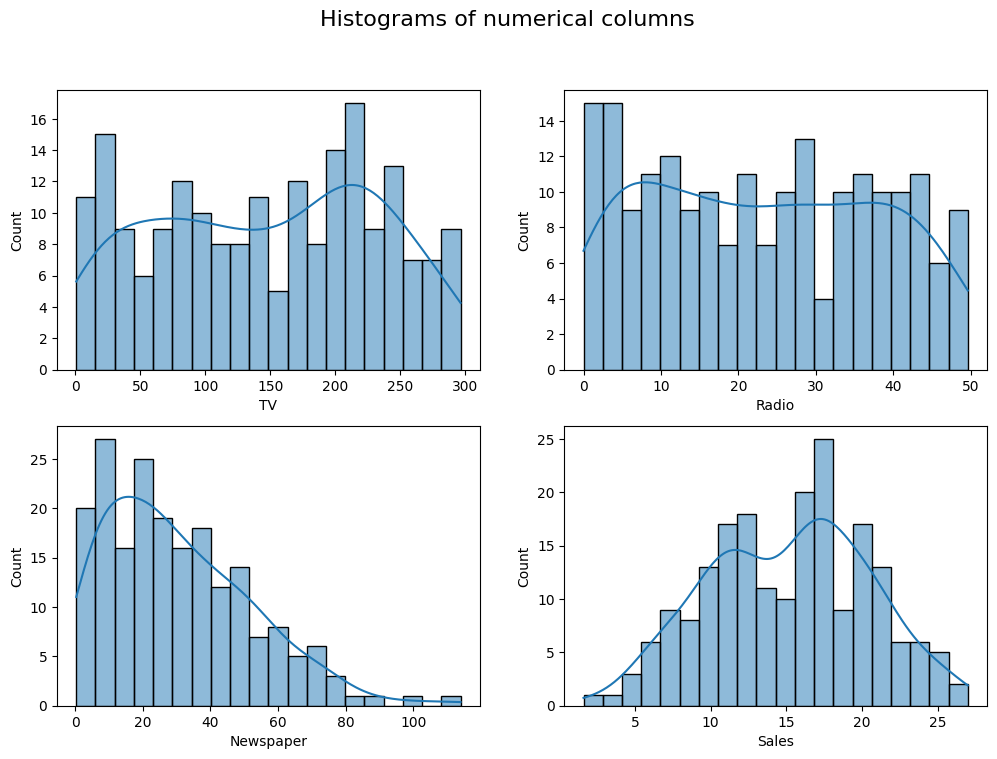

In [8]:
num_columns = list(df.select_dtypes(include=np.number).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,8))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=df,x=num_columns[0],kde=True,bins=20,ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

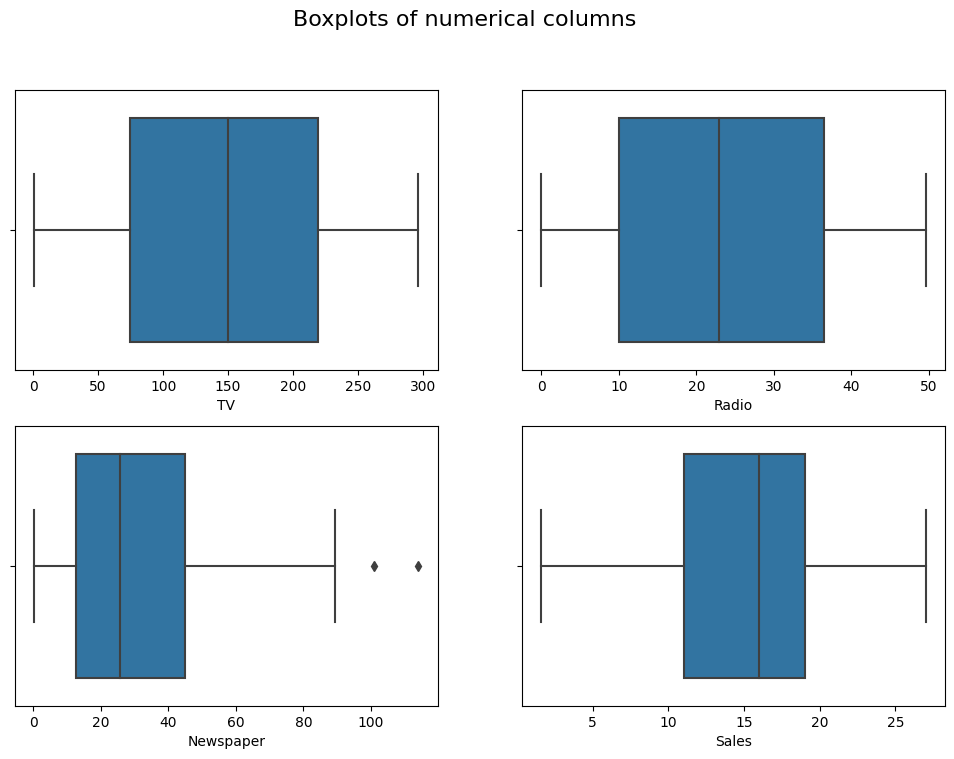

In [9]:
num_columns = list(df.select_dtypes(include=np.number).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,8))
for j in range(num):
    for i in range(num):
        try:
            sns.boxplot(data=df,x=num_columns[0],ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Boxplots of numerical columns', fontsize=16)
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
pt = PowerTransformer()
pt.fit(df)
df_pt = pt.transform(df)
df_pt = pd.DataFrame(df_pt,columns=df.columns)
df_pt.head()

,TV,Radio,Newspaper,Sales
0,0.948674,0.962247,1.514335,1.319413
1,-1.191314,1.040179,0.787683,-0.896017
2,-1.647757,1.370710,1.516998,-0.591253
3,0.141020,1.142387,1.214656,0.262484
4,0.452715,-0.748651,1.211704,0.527225


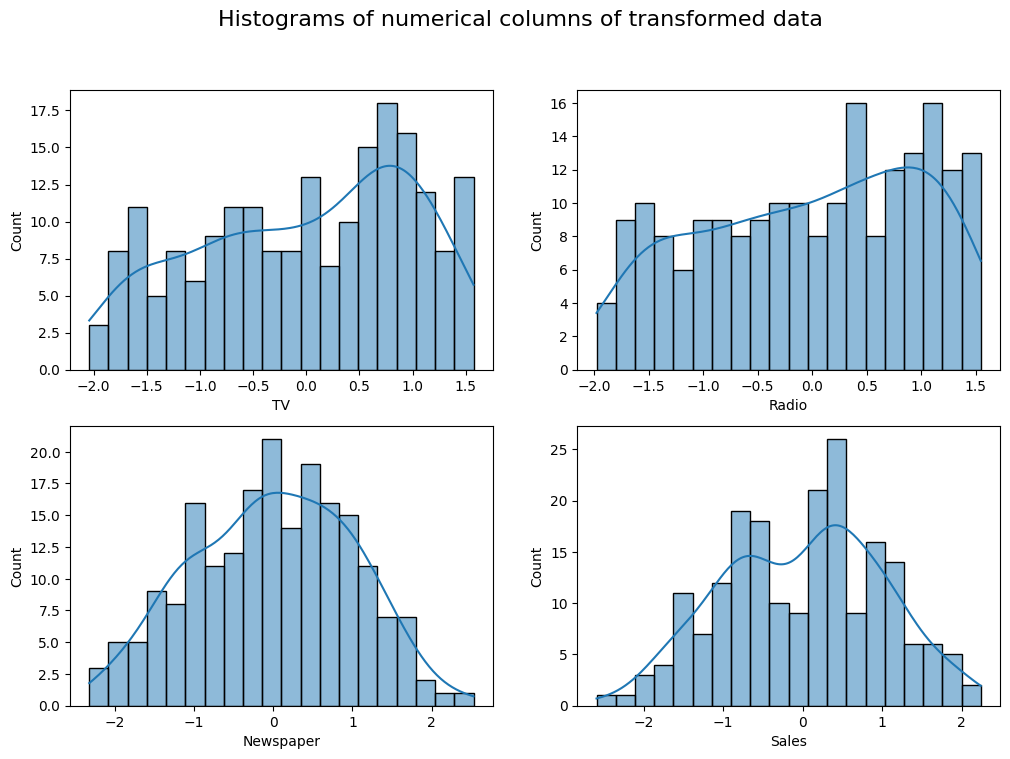

In [11]:
num_columns = list(df_pt.select_dtypes(include=np.number).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,8))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=df_pt,x=num_columns[0],kde=True,bins=20,ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns of transformed data', fontsize=16)
plt.show()

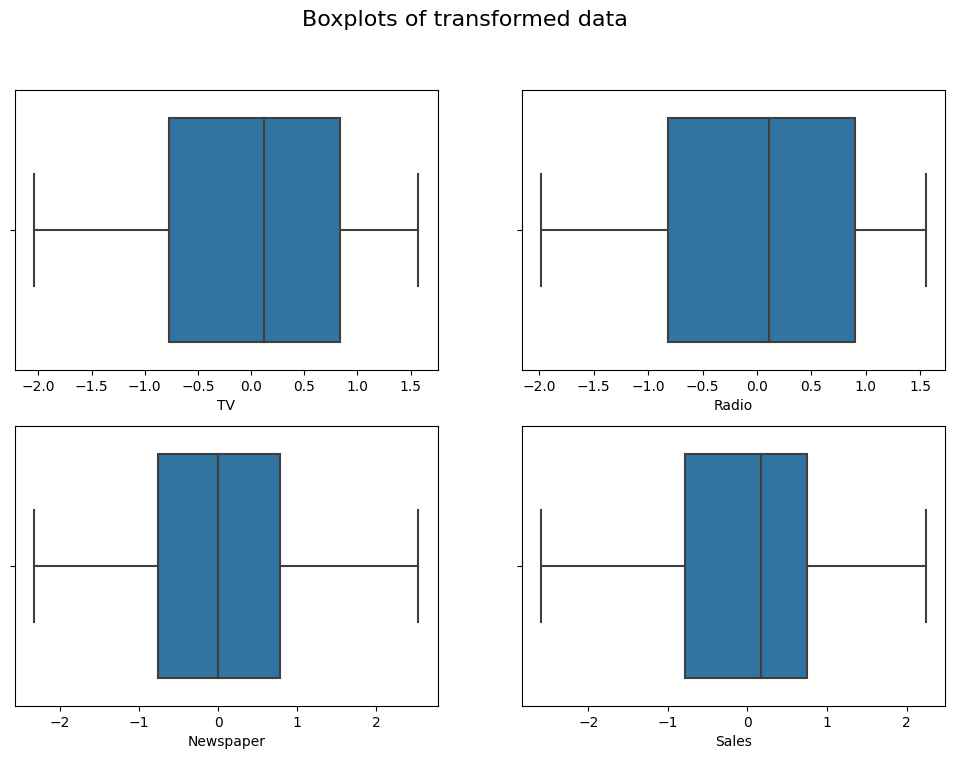

In [12]:
num_columns = list(df_pt.select_dtypes(include=np.number).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,8))
for j in range(num):
    for i in range(num):
        try:
            sns.boxplot(data=df_pt,x=num_columns[0],ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Boxplots of transformed data', fontsize=16)
plt.show()

correlation of features with the sale
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
Name: Sales, dtype: float64


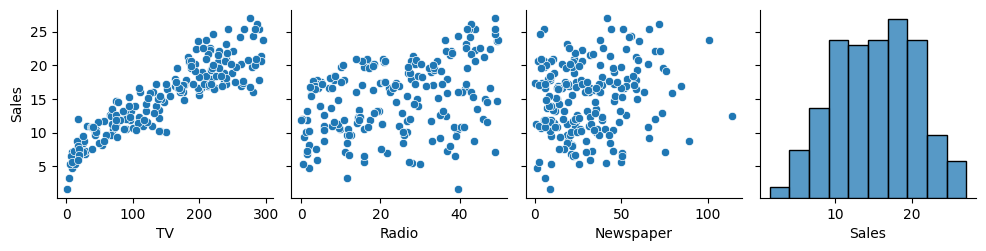

In [13]:
sns.pairplot(df,y_vars='Sales')
print('correlation of features with the sale')
print(df.corr()['Sales'])
plt.show()

MODEL


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [15]:
X= df_pt.drop(['Sales'],axis=1)
y= df_pt['Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred

array([ 0.43257364,  0.97206317,  1.52055181, -1.30288192,  1.21387441,
       -0.43979136,  1.11161656, -1.18149769,  0.37223939,  0.38902196,
       -1.17805807, -1.25414136,  0.47835006, -1.54309896, -0.4512799 ,
        0.02697417, -1.53133225,  0.61182218, -0.68767296,  1.03894166,
        1.04901858, -0.50221413, -0.83283012,  1.29979855, -0.99882412,
       -1.41365392,  1.06933515, -0.11522492, -0.72682644, -1.5236031 ,
        0.14110247, -0.75639926,  1.02731775, -1.10879982,  1.14814709,
        1.15643977, -0.5968672 ,  1.37154412, -0.33685415, -1.79167755])

In [21]:
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('R2:',r2_score(y_test,y_pred))
print(f'Adjusted R2 score : {1 - (1-lr.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')

MSE: 0.08707489467225903
MAE: 0.2262202525306584
R2: 0.9217267251772276
Adjusted R2 score : 0.9174957373489697


In [18]:
X= df_pt.drop(['Sales','Newspaper'],axis=1)

y= df_pt['Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('MSE after dropping newspaper :',mean_squared_error(y_test,y_pred))
print('MAE after dropping newspaper :',mean_absolute_error(y_test,y_pred))
print('R2 after dropping newspaper :',r2_score(y_test,y_pred))

MSE after dropping newspaper : 0.08707489467225903
MAE after dropping newspaper : 0.2262202525306584
R2 after dropping newspaper : 0.9217267251772276


In [19]:
coefs = lr.coef_
intercept = lr.intercept_
print(f"z = {coefs[0]:.3f}x + {coefs[1]:.3f}y + {intercept:.3f}")

z = 0.898x + 0.279y + 0.011
